 # Credit Card 

##  A) Data preparation and Modeling 


## Import necessary libraries

In [ ]:
!pip install jupyter notebook
!pip install scikit-learn
!pip install seaborn
!pip install pandas
!pip install matplotlib

In [56]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from weka.core.converters import Loader
from weka.core.classes import Random
from weka.classifiers import Classifier, Evaluation

## Upload the dataset

In [ ]:
df = pd.read_csv("E:\german_credit.csv")
df.head()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Creditability                      1000 non-null   int64
 1   Account Balance                    1000 non-null   int64
 2   Duration of Credit (month)         1000 non-null   int64
 3   Payment Status of Previous Credit  1000 non-null   int64
 4   Purpose                            1000 non-null   int64
 5   Credit Amount                      1000 non-null   int64
 6   Value Savings/Stocks               1000 non-null   int64
 7   Length of current employment       1000 non-null   int64
 8   Instalment per cent                1000 non-null   int64
 9   Sex & Marital Status               1000 non-null   int64
 10  Guarantors                         1000 non-null   int64
 11  Duration in Current address        1000 non-null   int64
 12  Most valuable availab

In [68]:
df.describe()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.700000,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,...,2.845000,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.155000,1.404000,1.037000
std,0.458487,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,...,1.103718,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856
min,0.000000,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,...,2.000000,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
50%,1.000000,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,...,3.000000,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
75%,1.000000,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,...,4.000000,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000
max,1.000000,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,...,4.000000,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000


## Look at the attribute type; e.g., nominal, ordinal or quantitative.
Creditability: Nominal; 
Account Balance: Ordina; 
Duration of Credit (month): Quantitati; e
Payment Status of Previous Credit: Ordinal
Purpose: Nom; nal
Credit Amount: Quantit; tive
Value Savings/Stocks: O; dinal
Length of current employment: Ordinal
Instalment percent: Quan; itative
Sex & Marital Status;  Nominal
Guarantor; : Nominal
Duration in Current address: Ordinal
Most valuable available as; et: Nominal
Age (years):; Quantitative
Concurrent Cr; dits: Nominal
Type of apartment: Nominal
No of Credits at this Ba; k: Quantitative
Oc; upation: Nominal
No of depend; nts: Quantitative
; Telephone: Nominal
Foreign Worker: Nominal

## Detect missing dat
There is not any missing value in the dataset

In [25]:
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])

Missing Values:
 Series([], dtype: int64)


## Detect duplicate rows
There are not any duplicated rows in the dataset

In [26]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


## Find max, min, mean and standard deviation of attributes.

In [27]:
df.describe()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.700000,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,...,2.845000,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.155000,1.404000,1.037000
std,0.458487,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,...,1.103718,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856
min,0.000000,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,...,2.000000,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
50%,1.000000,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,...,3.000000,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
75%,1.000000,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,...,4.000000,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000
max,1.000000,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,...,4.000000,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000


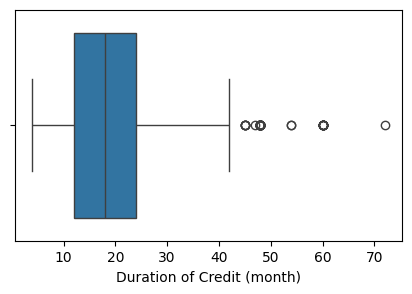

In [28]:
plt.figure(figsize=(5,3))
sns.boxplot(x=df['Duration of Credit (month)'])
plt.show()

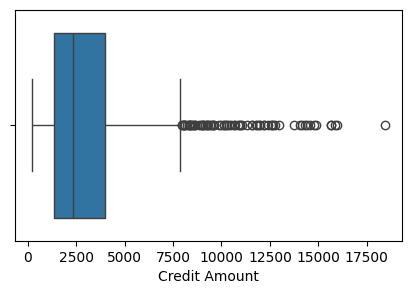

In [29]:
plt.figure(figsize=(5,3))
sns.boxplot(x=df['Credit Amount'])
plt.show()

## Explore the correlation between attributes
it showes that the "account balance" is the most correlated attribute to "creditability". 

In [30]:
corr_matrix=df.corr()
corr_matrix["Creditability"]

Creditability                        1.000000
Account Balance                      0.350847
Duration of Credit (month)          -0.214927
Payment Status of Previous Credit    0.228785
Purpose                             -0.017979
Credit Amount                       -0.154740
Value Savings/Stocks                 0.178943
Length of current employment         0.116002
Instalment per cent                 -0.072404
Sex & Marital Status                 0.088184
Guarantors                           0.025137
Duration in Current address         -0.002967
Most valuable available asset       -0.142612
Age (years)                          0.091272
Concurrent Credits                   0.109844
Type of apartment                    0.018119
No of Credits at this Bank           0.045732
Occupation                          -0.032735
No of dependents                     0.003015
Telephone                            0.036466
Foreign Worker                       0.082079
Name: Creditability, dtype: float6

## Data reduction
based on the correlation between attributes we can omit some attributes that have very low effect on our prediction

In [31]:
df_reduct=df[['Creditability','Account Balance','Duration of Credit (month)','Payment Status of Previous Credit', 'Credit Amount','Value Savings/Stocks',
           'Length of current employment','Most valuable available asset','Concurrent Credits','Foreign Worker']]
df_reduct

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Credit Amount,Value Savings/Stocks,Length of current employment,Most valuable available asset,Concurrent Credits,Foreign Worker
0,1,1,18,4,1049,1,2,2,3,1
1,1,1,9,4,2799,1,3,1,3,1
2,1,2,12,2,841,2,4,1,3,1
3,1,1,12,4,2122,1,3,1,3,2
4,1,1,12,4,2171,1,3,2,1,2
...,...,...,...,...,...,...,...,...,...,...
995,0,1,24,2,1987,1,3,1,3,1
996,0,1,24,2,2303,1,5,1,3,1
997,0,4,21,4,12680,5,5,4,3,1
998,0,2,12,2,6468,5,1,4,3,1


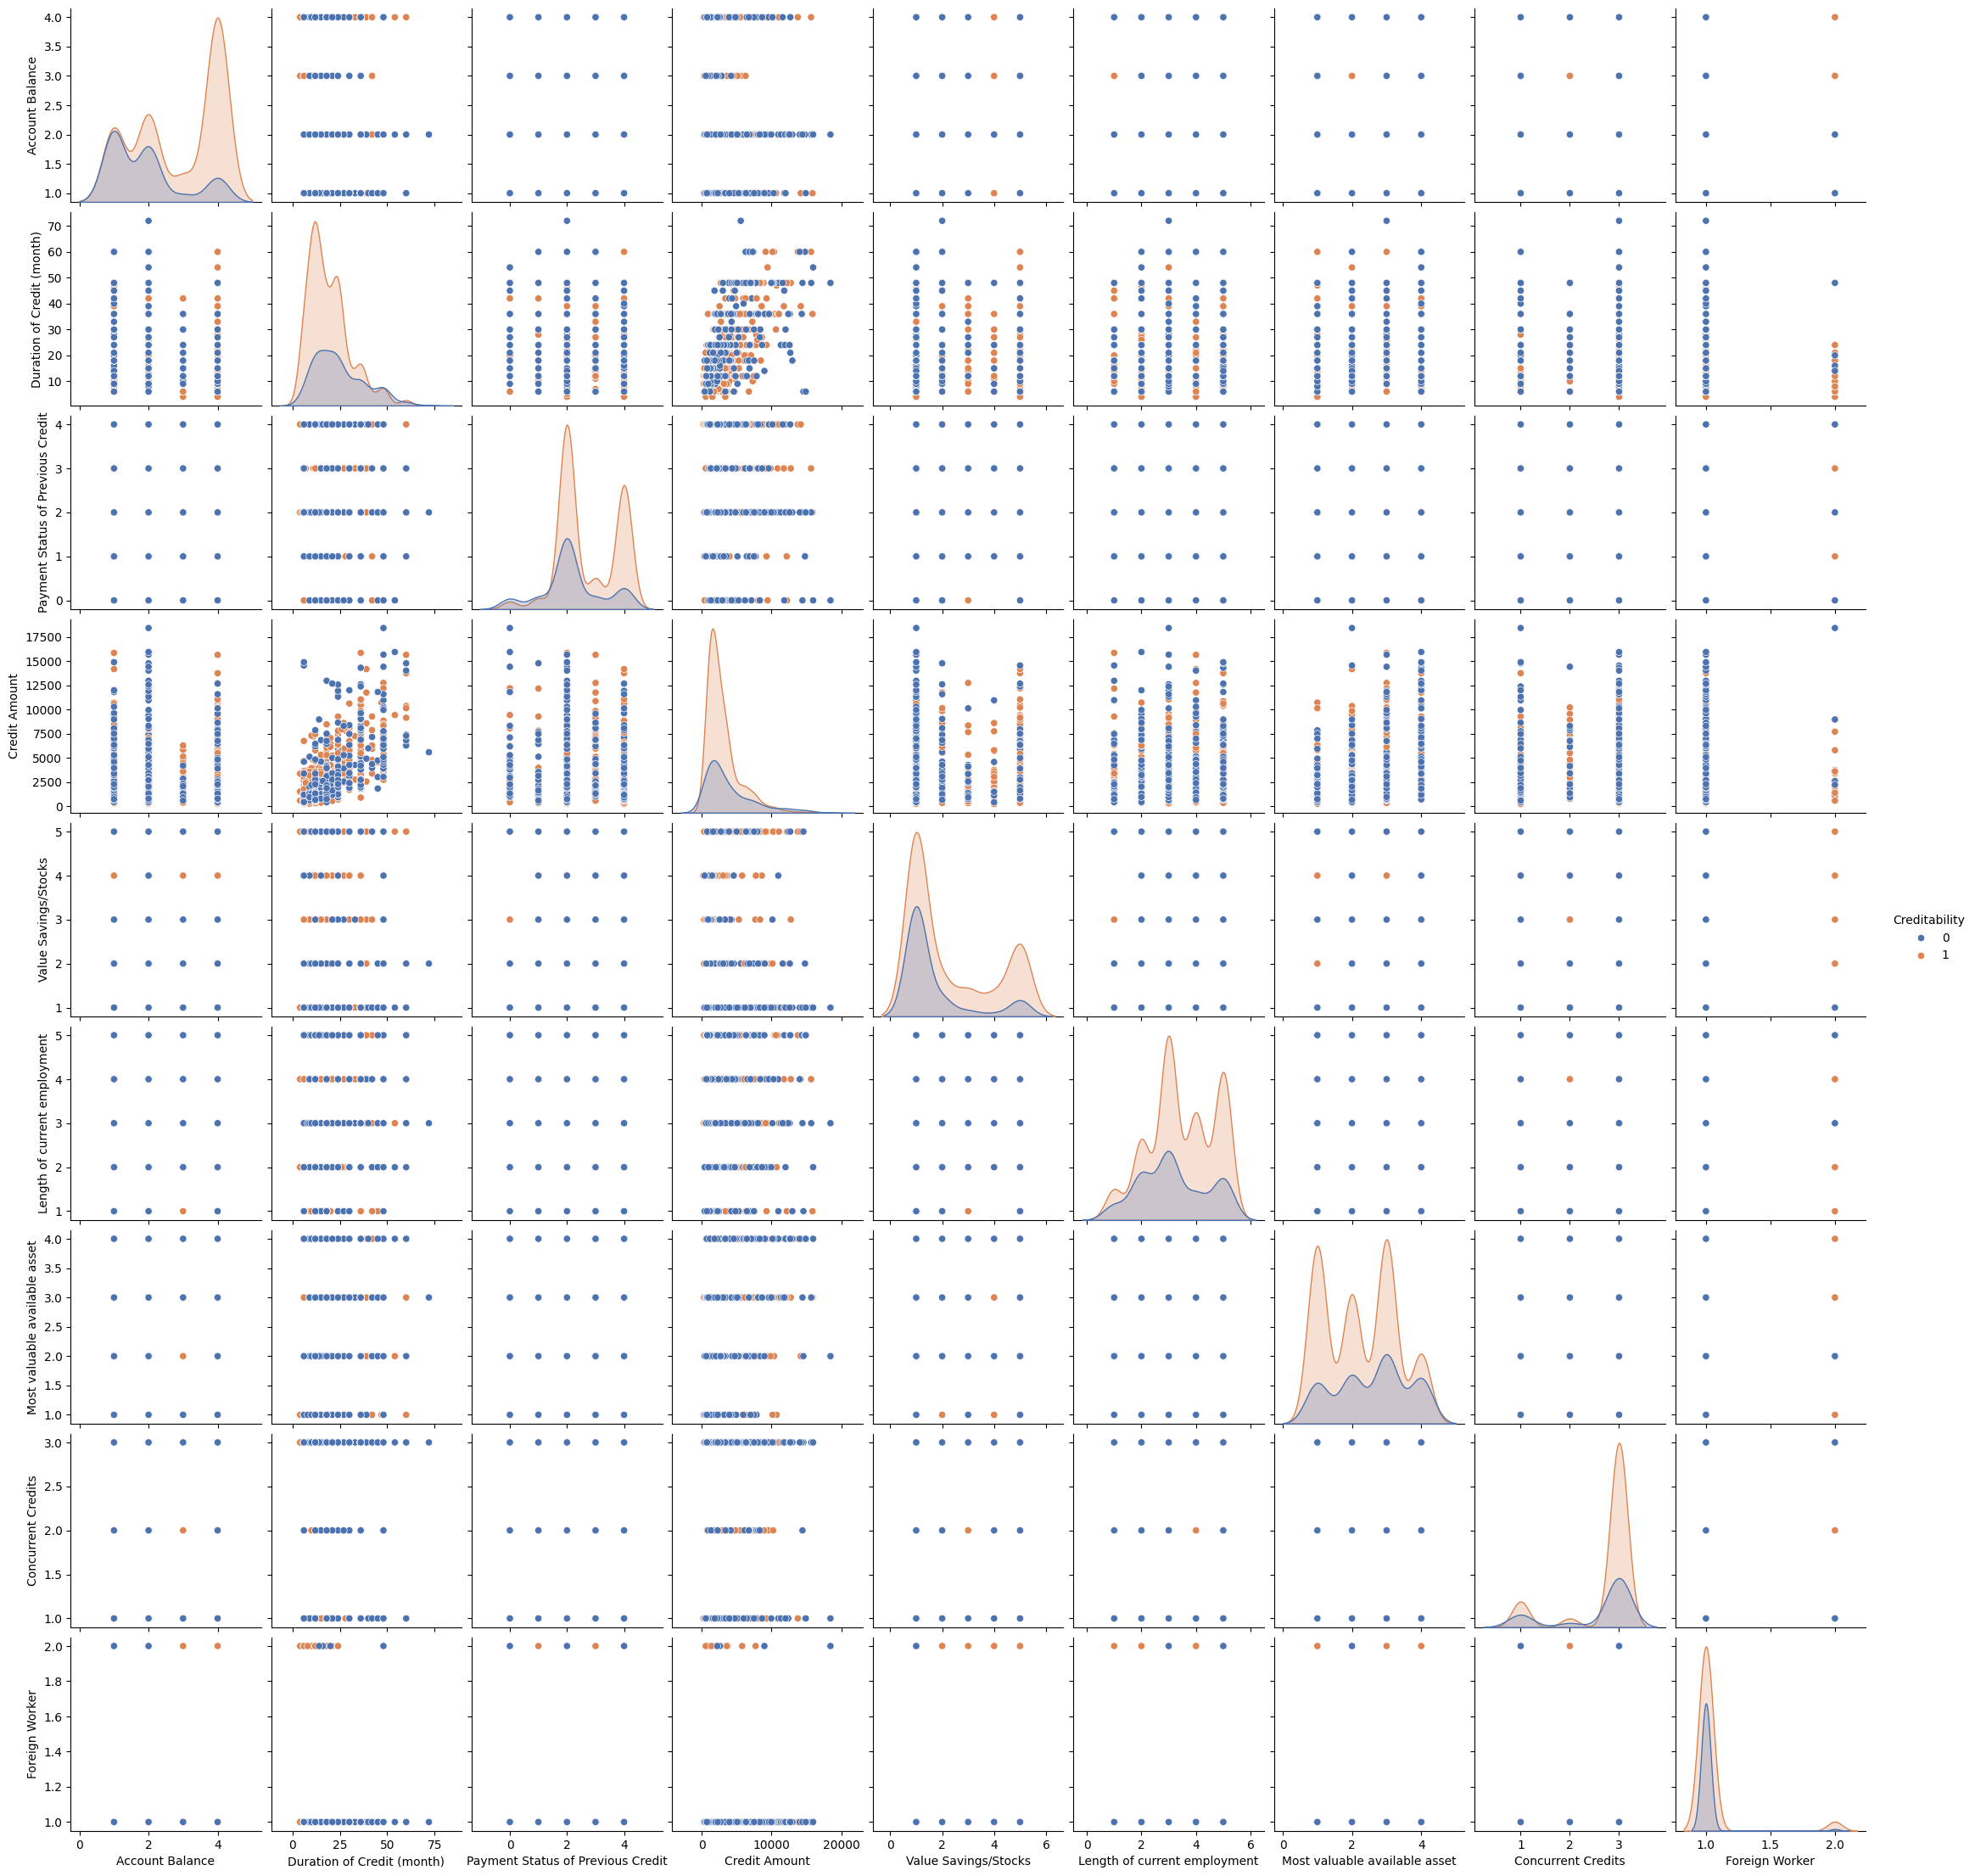

In [32]:
sns.pairplot(df_reduct, hue="Creditability", palette="deep")

<Axes: xlabel='Account Balance', ylabel='count'>

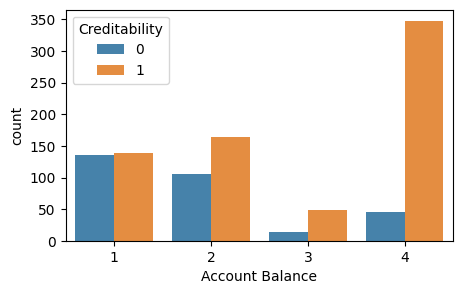

In [33]:
#sns.set_style("darkgrid")
plt.figure(figsize = (5,3))
sns.countplot(x=df_reduct['Account Balance'], hue=df_reduct['Creditability'], alpha=0.9)

In [34]:
df_reduct.value_counts()

Creditability  Account Balance  Duration of Credit (month)  Payment Status of Previous Credit  Credit Amount  Value Savings/Stocks  Length of current employment  Most valuable available asset  Concurrent Credits  Foreign Worker
0              1                6                           1                                  1198           1                     5                             4                              3                   1                 1
1              4                6                           2                                  1595           1                     4                             2                              3                   1                 1
                                                            0                                  426            1                     5                             3                              3                   1                 1
                                                                         

In [35]:
data_x= df_reduct.drop("Creditability", axis =1)
data_x.head()

,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Credit Amount,Value Savings/Stocks,Length of current employment,Most valuable available asset,Concurrent Credits,Foreign Worker
0,1,18,4,1049,1,2,2,3,1
1,1,9,4,2799,1,3,1,3,1
2,2,12,2,841,2,4,1,3,1
3,1,12,4,2122,1,3,1,3,2
4,1,12,4,2171,1,3,2,1,2


In [36]:
y=df_reduct['Creditability']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Creditability, dtype: int64

## Normalizing the data

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_x_norm = scaler.fit_transform(data_x)
data_x_norm

array([[-1.25456565, -0.24085723,  1.34401408, ..., -0.3410551 ,
         0.46083068, -0.19601428],
       [-1.25456565, -0.9875727 ,  1.34401408, ..., -1.29372298,
         0.46083068, -0.19601428],
       [-0.45902624, -0.73866754, -0.50342796, ..., -1.29372298,
         0.46083068, -0.19601428],
       ...,
       [ 1.13205258,  0.00804793,  1.34401408, ...,  1.56428065,
         0.46083068, -0.19601428],
       [-0.45902624, -0.73866754, -0.50342796, ...,  1.56428065,
         0.46083068, -0.19601428],
       [-1.25456565,  0.75476341, -0.50342796, ..., -0.3410551 ,
         0.46083068, -0.19601428]])

In [44]:
features = ['Account Balance','Duration of Credit (month)','Payment Status of Previous Credit','Credit Amount','Value Savings/Stocks',
           'Length of current employment','Most valuable available asset','Concurrent Credits','Foreign Worker']
x = pd.DataFrame(data=data_x_norm, columns=features)
x.head()

,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Credit Amount,Value Savings/Stocks,Length of current employment,Most valuable available asset,Concurrent Credits,Foreign Worker
0,-1.254566,-0.240857,1.344014,-0.787657,-0.699707,-1.145978,-0.341055,0.460831,-0.196014
1,-1.254566,-0.987573,1.344014,-0.167384,-0.699707,-0.317959,-1.293723,0.460831,-0.196014
2,-0.459026,-0.738668,-0.503428,-0.861381,-0.066488,0.510060,-1.293723,0.460831,-0.196014
3,-1.254566,-0.738668,1.344014,-0.407341,-0.699707,-0.317959,-1.293723,0.460831,5.101669
4,-1.254566,-0.738668,1.344014,-0.389974,-0.699707,-0.317959,-0.341055,-2.375050,5.101669


# deviding data to train and test

In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

In [150]:
x_test.head()

,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Credit Amount,Value Savings/Stocks,Length of current employment,Most valuable available asset,Concurrent Credits,Foreign Worker
204,-1.254566,0.008048,-0.503428,0.174297,1.833169,0.510060,-1.293723,0.460831,5.101669
71,1.132053,0.754763,-0.503428,-0.497724,1.833169,1.338078,0.611613,0.460831,-0.196014
594,-1.254566,0.754763,-2.350870,0.464939,-0.699707,-0.317959,-1.293723,0.460831,-0.196014
672,-0.459026,-0.240857,-0.503428,-0.764973,-0.699707,-0.317959,-1.293723,0.460831,-0.196014
14,-1.254566,-0.240857,-0.503428,-0.473267,1.833169,0.510060,0.611613,0.460831,-0.196014


# Applying Decision Tree algorithm

In [46]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
tree=DecisionTreeRegressor()
tree.fit(x_train,y_train)

DecisionTreeRegressor()

In [47]:
credit_risk_prediction_train=tree.predict(x_train)
credit_risk_prediction_test=tree.predict(x_test)

In [48]:
tree_mse=mean_squared_error(y_test,credit_risk_prediction_test)
tree_rmse=np.sqrt(tree_mse)
tree_rmse

0.565685424949238

In [49]:
from sklearn.metrics import accuracy_score
acc_train=accuracy_score(y_train,credit_risk_prediction_train)
acc_test=accuracy_score(y_test,credit_risk_prediction_test)
acc_train,acc_test

(1.0, 0.68)

# Applying Naive Bayes algorithm

In [69]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)
credit_risk_prediction_train = nb.predict(x_train)
credit_risk_prediction_test = nb.predict(x_test)


In [51]:
nb_mse=mean_squared_error(y_test,credit_risk_prediction_test)
nb_rmse=np.sqrt(nb_mse)
nb_rmse

0.51478150704935

In [52]:
acc_train=accuracy_score(y_train,credit_risk_prediction_train)
acc_test=accuracy_score(y_test,credit_risk_prediction_test)
acc_train,acc_test

(0.725, 0.735)